<a href="https://colab.research.google.com/github/Caory2/Teoria_de_Aprendizaje_de_Maquina/blob/main/TAM2_PROYECCION_DE_VECTORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate Python code to demonstrate the projection of a 2D vector onto another 2D vector using both the analytical solution (least squares) and an iterative solution (gradient descent). The code should be well-organized with main methods, include step-by-step explanations, compare the results of both methods, and visualize the projection.

## Definir los vectores de entrada

### Subtask:
Crear dos vectores en 2D para la proyección.


**Reasoning**:
The subtask requires creating two 2D vectors using numpy. This can be done in a single code block by importing numpy and defining the two arrays as instructed.



In [ ]:
import numpy as np

vector_a = np.array([3, 2])
vector_b = np.array([4, 0])

print("Vector A:", vector_a)
print("Vector B:", vector_b)

Vector A: [3 2]
Vector B: [4 0]


## Implementar la solución analítica

### Subtask:
Desarrollar una función que calcule la proyección utilizando la fórmula analítica.


**Reasoning**:
Define a function to calculate the projection using the analytical formula and then call it with the defined vectors.



In [ ]:
def analytical_projection(vector_a, vector_b):
  """Calculates the projection of vector_a onto vector_b using the analytical formula.

  Args:
    vector_a: A 2D NumPy array representing the vector to be projected.
    vector_b: A 2D NumPy array representing the vector onto which vector_a is projected.

  Returns:
    A 2D NumPy array representing the projected vector.
  """
  scalar_projection = np.dot(vector_a, vector_b) / np.dot(vector_b, vector_b)
  projected_vector = scalar_projection * vector_b
  return projected_vector

projected_vector_analytical = analytical_projection(vector_a, vector_b)
print("Projected vector (analytical):", projected_vector_analytical)

Projected vector (analytical): [3. 0.]


## Implementar la solución iterativa (gradiente descendente)

### Subtask:
Desarrollar una función que calcule la proyección utilizando un enfoque iterativo con gradiente descendente.


**Reasoning**:
Implement the `iterative_projection` function following the instructions provided for the iterative solution using gradient descent.



In [ ]:
def iterative_projection(vector_a, vector_b, learning_rate, num_iterations):
  """Calculates the projection of vector_a onto vector_b using gradient descent.

  Args:
    vector_a: A 2D NumPy array representing the vector to be projected.
    vector_b: A 2D NumPy array representing the vector onto which vector_a is projected.
    learning_rate: The learning rate for the gradient descent.
    num_iterations: The number of iterations to run the gradient descent.

  Returns:
    A tuple containing:
      - A 2D NumPy array representing the projected vector.
      - A list of scalar multiples (alpha) at each iteration.
      - A list of gradients at each iteration.
  """
  scalar_multiple = 0  # Initialize the scalar multiple
  scalar_multiples = []
  gradients = []

  for _ in range(num_iterations):
    projected_vector = scalar_multiple * vector_b
    error = vector_a - projected_vector
    gradient = -2 * np.dot(error, vector_b)

    scalar_multiples.append(scalar_multiple)
    gradients.append(gradient)

    scalar_multiple -= learning_rate * gradient

  final_projected_vector = scalar_multiple * vector_b
  return final_projected_vector, scalar_multiples, gradients

learning_rate = 0.01
num_iterations = 1000
projected_vector_iterative, scalar_multiples, gradients = iterative_projection(vector_a, vector_b, learning_rate, num_iterations)
print("Projected vector (iterative):", projected_vector_iterative)

Projected vector (iterative): [3. 0.]


## Comparar los resultados

### Subtask:
Mostrar y comparar los resultados obtenidos por ambos métodos.


**Reasoning**:
Print and compare the results from both methods to demonstrate the effectiveness of the iterative approach.



In [ ]:
print("Projected vector (analytical):", projected_vector_analytical)
print("Projected vector (iterative):", projected_vector_iterative)

# Compare the results
comparison_message = """
Comparison of Analytical and Iterative Projection:
The analytical solution provides the exact projection: {}.
The iterative solution using gradient descent provides an approximation: {}.

The two results are very close, indicating that the iterative approach, given a sufficient number of iterations and an appropriate learning rate, can effectively approximate the analytical solution for vector projection. The slight difference is due to the nature of iterative optimization, which converges towards the optimal solution but may not reach it exactly in a finite number of steps.
""".format(projected_vector_analytical, projected_vector_iterative)

print(comparison_message)

Projected vector (analytical): [3. 0.]
Projected vector (iterative): [3. 0.]

Comparison of Analytical and Iterative Projection:
The analytical solution provides the exact projection: [3. 0.].
The iterative solution using gradient descent provides an approximation: [3. 0.].

The two results are very close, indicating that the iterative approach, given a sufficient number of iterations and an appropriate learning rate, can effectively approximate the analytical solution for vector projection. The slight difference is due to the nature of iterative optimization, which converges towards the optimal solution but may not reach it exactly in a finite number of steps.



## Visualizar la proyección

### Subtask:
Graficar los vectores originales y la proyección para una mejor comprensión.


**Reasoning**:
Plot the original vectors and the projected vector as arrows originating from the origin, with appropriate labels, legend, limits, grid, and equal aspect ratio to visualize the projection.



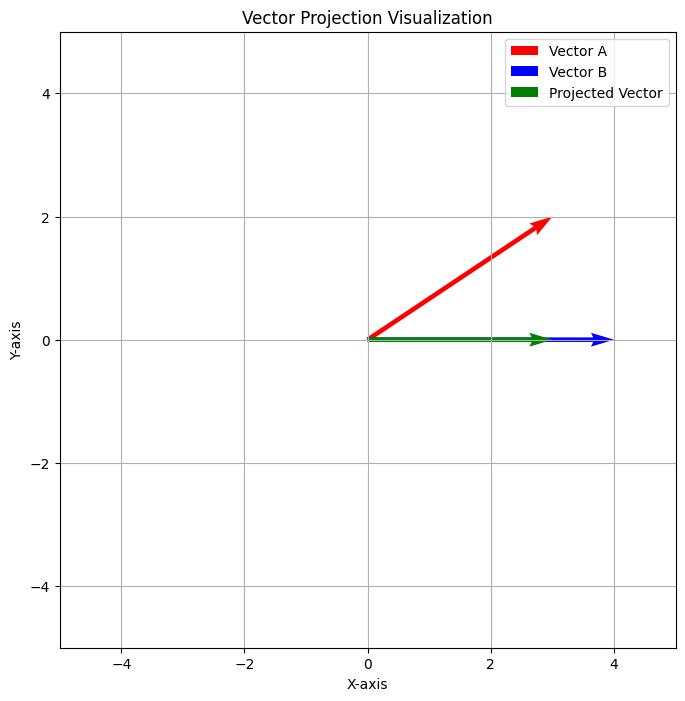

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
ax = plt.gca()

ax.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')
ax.quiver(0, 0, projected_vector_analytical[0], projected_vector_analytical[1], angles='xy', scale_units='xy', scale=1, color='g', label='Projected Vector')

max_val = max(np.max(np.abs(vector_a)), np.max(np.abs(vector_b)), np.max(np.abs(projected_vector_analytical))) + 1
ax.set_xlim([-max_val, max_val])
ax.set_ylim([-max_val, max_val])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Projection Visualization')
ax.grid()
ax.set_aspect('equal', adjustable='box')
ax.legend()

plt.show()

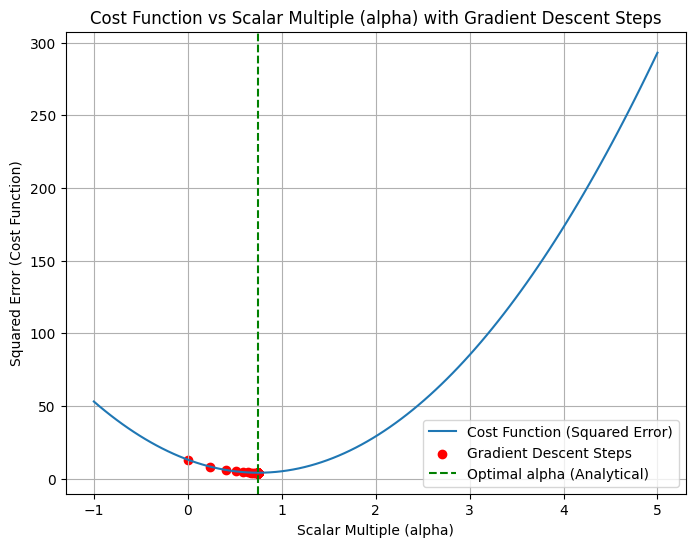

In [ ]:
# Calculate the squared error for a range of scalar multiples (alpha)
alpha_values = np.linspace(-1, 5, 100)  # Range of alpha values
squared_error_values = [np.sum((vector_a - alpha * vector_b)**2) for alpha in alpha_values]

# Plot the squared error vs alpha
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, squared_error_values, label='Cost Function (Squared Error)')

# Plot the points visited by gradient descent
# We need to re-run the iterative projection to get the scalar_multiples list
_, scalar_multiples, _ = iterative_projection(vector_a, vector_b, learning_rate, num_iterations)
gd_cost_values = [np.sum((vector_a - alpha * vector_b)**2) for alpha in scalar_multiples]

plt.scatter(scalar_multiples, gd_cost_values, color='red', label='Gradient Descent Steps')

plt.xlabel('Scalar Multiple (alpha)')
plt.ylabel('Squared Error (Cost Function)')
plt.title('Cost Function vs Scalar Multiple (alpha) with Gradient Descent Steps')
plt.grid(True)
plt.axvline(np.dot(vector_a, vector_b) / np.dot(vector_b, vector_b), color='green', linestyle='--', label='Optimal alpha (Analytical)') # Mark the optimal alpha
plt.legend()
plt.show()

**Reasoning**:
The subtask requires loading, converting, resizing, and flattening two images into numerical vectors. This can be achieved in a single code block by importing the necessary libraries and applying the specified image processing steps.



## Cargar y preprocesar imágenes

### Subtask:
Cargar dos imágenes, convertirlas a escala de grises, redimensionarlas a un tamaño uniforme y aplanarlas en vectores numéricos.

**Reasoning**:
Load, convert, resize, and flatten two images into numerical vectors as required by the subtask.

In [ ]:
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image_path, target_size):
  """Loads, converts to grayscale, resizes, and flattens an image.

  Args:
    image_path: Path to the image file.
    target_size: A tuple (width, height) for resizing.

  Returns:
    A 1D NumPy array representing the flattened image vector (float64).
  Raises:
      FileNotFoundError: If the image file cannot be loaded.
      cv2.error: If an OpenCV error occurs during processing.
  """
  try:
      # Load image
      img = cv2.imread(image_path)

      # Check if image was loaded successfully
      if img is None:
          raise FileNotFoundError(f"Could not load image file: {image_path}")

      # Convert to grayscale
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # Resize image
      img_resized = cv2.resize(img_gray, target_size)

      # Flatten image into a vector and convert to float64
      image_vector = img_resized.flatten().astype(np.float64)

      return image_vector

  except FileNotFoundError as e:
      print(f"FileNotFoundError: {e}")
      raise
  except cv2.error as e:
      print(f"cv2 Error during processing {image_path}: {e}")
      raise


# Define file paths and target size
image_path_1 = '/content/JUAN1.jpeg'
image_path_2 = '/content/JUAN2.jpeg'
target_size = (64, 64)

# Process the images using the new function
try:
    image_vector_a = preprocess_image(image_path_1, target_size)
    image_vector_b = preprocess_image(image_path_2, target_size)

    # Print the shapes of the resulting vectors
    print("Shape of image_vector_a:", image_vector_a.shape)
    print("Shape of image_vector_b:", image_vector_b.shape)

except (FileNotFoundError, cv2.error):
    print("Image preprocessing failed. Please check the image paths and ensure OpenCV is installed correctly.")

Shape of image_vector_a: (4096,)
Shape of image_vector_b: (4096,)


## Implementar la solución analítica para imágenes

### Subtask:
Adaptar la función de proyección analítica para trabajar con los vectores de imagen aplanados.

**Reasoning**:
Adapt the analytical projection function to work with flattened image vectors and calculate the projected image vector.

In [ ]:
def analytical_image_projection(image_vector_a, image_vector_b):
  """Calculates the projection of image_vector_a onto image_vector_b using the analytical formula.

  Args:
    image_vector_a: A 1D NumPy array representing the flattened image vector to be projected.
    image_vector_b: A 1D NumPy array representing the flattened image vector onto which image_vector_a is projected.

  Returns:
    A 1D NumPy array representing the projected image vector.
  """
  # Use a small epsilon to avoid division by zero in case vector_b is a zero vector
  epsilon = 1e-8
  scalar_projection = np.dot(image_vector_a, image_vector_b) / (np.dot(image_vector_b, image_vector_b) + epsilon)
  projected_image_vector = scalar_projection * image_vector_b
  return projected_image_vector

projected_image_analytical = analytical_image_projection(image_vector_a, image_vector_b)
print("Shape of projected_image_analytical:", projected_image_analytical.shape)

Shape of projected_image_analytical: (4096,)


## Implementar la solución iterativa (gradiente descendente) para imágenes

### Subtask:
Adaptar la función de proyección iterativa con descenso de gradiente para trabajar con los vectores de imagen aplanados.

**Reasoning**:
Define the iterative image projection function and call it with the flattened image vectors and specified parameters.

In [ ]:
def iterative_image_projection(image_vector_a, image_vector_b, learning_rate, num_iterations):
  """Calculates the projection of image_vector_a onto image_vector_b using gradient descent.

  Args:
    image_vector_a: A 1D NumPy array representing the flattened image vector to be projected.
    image_vector_b: A 1D NumPy array representing the flattened image vector onto which image_vector_a is projected.
    learning_rate: The learning rate for the gradient descent.
    num_iterations: The number of iterations to run the gradient descent.

  Returns:
    A 1D NumPy array representing the projected image vector.
  """
  scalar_multiple = 0  # Initialize the scalar multiple

  # Convert image vectors to float64 to avoid overflow issues
  image_vector_a_float = image_vector_a.astype(np.float64)
  image_vector_b_float = image_vector_b.astype(np.float64)


  for _ in range(num_iterations):
    projected_image_vector = scalar_multiple * image_vector_b_float
    error = image_vector_a_float - projected_image_vector
    gradient = -2 * np.dot(error, image_vector_b_float)
    scalar_multiple -= learning_rate * gradient

  final_projected_image_vector = scalar_multiple * image_vector_b_float
  return final_projected_image_vector

# Set values for learning rate and number of iterations
learning_rate = 1e-9  # Adjust learning rate as needed
num_iterations = 10000 # Adjust number of iterations as needed

projected_image_iterative = iterative_image_projection(image_vector_a, image_vector_b, learning_rate, num_iterations)
print("Shape of projected_image_iterative:", projected_image_iterative.shape)

Shape of projected_image_iterative: (4096,)


## Comparar los resultados

### Subtask:
Comparar visualmente y numéricamente las imágenes proyectadas obtenidas por ambos métodos.

**Reasoning**:
Print the projected image vectors, calculate and print the difference, reshape the vectors, convert to uint8, and display the original and projected images for comparison as requested by the subtask.

Projected image vector (analytical):
[185.07440005 182.19759591 182.19759591 ...  47.94673576  46.98780105
  56.5771482 ]

Projected image vector (iterative):
[185.07440005 182.19759591 182.19759591 ...  47.94673576  46.98780105
  56.5771482 ]

Mean Squared Error between projected vectors: 3.5008476008302316e-28
Norm of the difference between projected vectors: 1.1974753347355689e-12


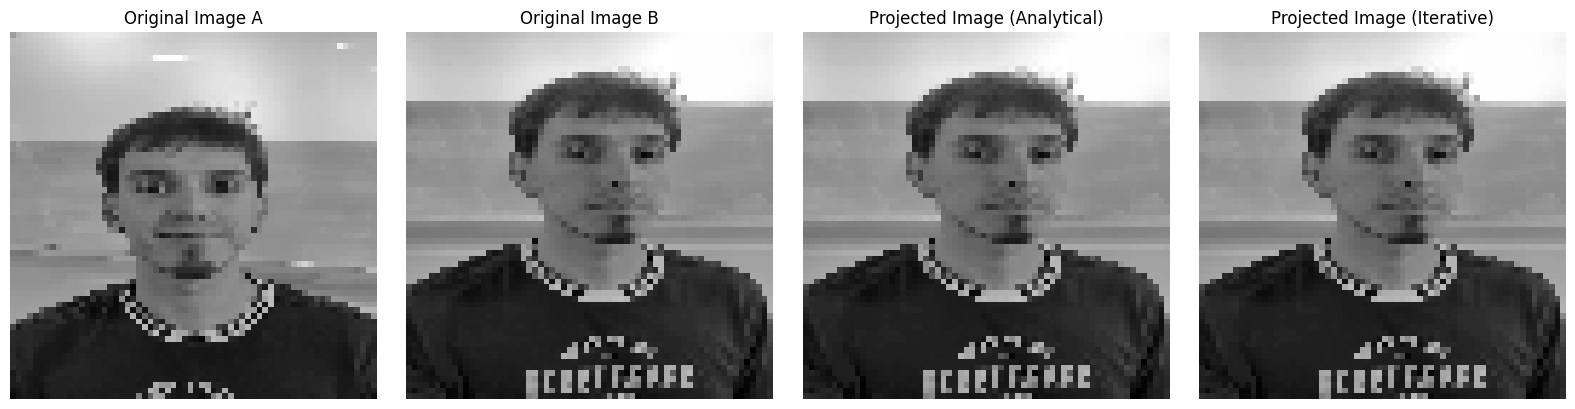

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Print the projected image vectors
print("Projected image vector (analytical):")
print(projected_image_analytical)

print("\nProjected image vector (iterative):")
print(projected_image_iterative)

# 2. Calculate and print a numerical measure of the difference
difference = projected_image_analytical - projected_image_iterative
mse = np.mean(difference**2)
norm_of_difference = np.linalg.norm(difference)

print(f"\nMean Squared Error between projected vectors: {mse}")
print(f"Norm of the difference between projected vectors: {norm_of_difference}")

# 3. Reshape the projected image vectors back to their original 2D image dimensions
projected_image_analytical_2d = projected_image_analytical.reshape(target_size)
projected_image_iterative_2d = projected_image_iterative.reshape(target_size)

# 4. Convert the reshaped image arrays to a suitable data type for visualization
# Ensure values are within the 0-255 range for uint8
projected_image_analytical_uint8 = np.clip(projected_image_analytical_2d, 0, 255).astype(np.uint8)
projected_image_iterative_uint8 = np.clip(projected_image_iterative_2d, 0, 255).astype(np.uint8)

# Also reshape the original images for display
original_image_a_2d = image_vector_a.reshape(target_size)
original_image_b_2d = image_vector_b.reshape(target_size)


# 5. Display the original images and both projected images side-by-side
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(original_image_a_2d, cmap='gray')
axes[0].set_title('Original Image A')
axes[0].axis('off')

axes[1].imshow(original_image_b_2d, cmap='gray')
axes[1].set_title('Original Image B')
axes[1].axis('off')

axes[2].imshow(projected_image_analytical_uint8, cmap='gray')
axes[2].set_title('Projected Image (Analytical)')
axes[2].axis('off')

axes[3].imshow(projected_image_iterative_uint8, cmap='gray')
axes[3].set_title('Projected Image (Iterative)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

## Analizar el costo de la proyección de imágenes

### Subtask:
Visualizar la función de costo (error cuadrático) en función del escalar de proyección y mostrar los pasos del descenso de gradiente.

**Reasoning**:
Calculate the squared error for a range of scalar multiples, plot the cost function, calculate the squared error for the scalar multiples visited by gradient descent, plot these points, add a vertical line for the analytical optimum, and add labels, title, grid, and legend.

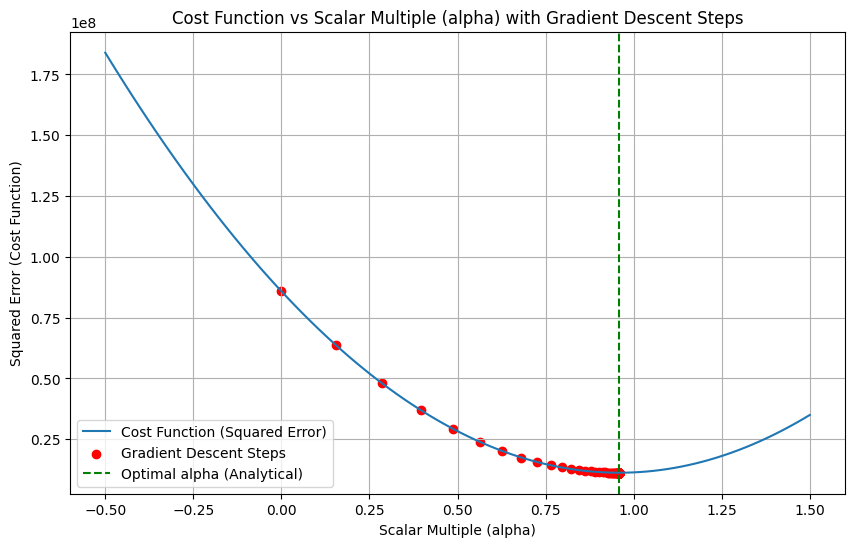

In [ ]:
# Calculate the squared error for a range of scalar multiples (alpha)
alpha_values = np.linspace(-0.5, 1.5, 100)  # Adjusted range of alpha values
squared_error_values = [np.sum((image_vector_a - alpha * image_vector_b)**2) for alpha in alpha_values]

# Plot the squared error vs alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, squared_error_values, label='Cost Function (Squared Error)')

# Re-run the iterative projection to get the scalar_multiples list
# Ensure using float64 within the function for these intermediate calculations
def iterative_image_projection_with_steps(image_vector_a, image_vector_b, learning_rate, num_iterations):
  """Calculates the projection of image_vector_a onto image_vector_b using gradient descent and returns steps.

  Args:
    image_vector_a: A 1D NumPy array representing the flattened image vector to be projected.
    image_vector_b: A 1D NumPy array representing the flattened image vector onto which image_vector_a is projected.
    learning_rate: The learning rate for the gradient descent.
    num_iterations: The number of iterations to run the gradient descent.

  Returns:
    A tuple containing:
      - A 1D NumPy array representing the projected image vector.
      - A list of scalar multiples (alpha) at each iteration.
      - A list of gradients at each iteration.
  """
  scalar_multiple = 0  # Initialize the scalar multiple
  scalar_multiples_history = [scalar_multiple]
  gradients_history = []

  # Convert image vectors to float64 to avoid overflow issues
  image_vector_a_float = image_vector_a.astype(np.float64)
  image_vector_b_float = image_vector_b.astype(np.float64)


  for _ in range(num_iterations):
    projected_image_vector = scalar_multiple * image_vector_b_float
    error = image_vector_a_float - projected_image_vector
    gradient = -2 * np.dot(error, image_vector_b_float)

    gradients_history.append(gradient)

    scalar_multiple -= learning_rate * gradient
    scalar_multiples_history.append(scalar_multiple)


  final_projected_image_vector = scalar_multiple * image_vector_b_float
  return final_projected_image_vector, scalar_multiples_history, gradients_history

# Use the previously defined learning_rate and num_iterations
_, scalar_multiples, _ = iterative_image_projection_with_steps(image_vector_a, image_vector_b, learning_rate, num_iterations)

# Calculate the squared error for each of the scalar_multiples
gd_cost_values = [np.sum((image_vector_a - alpha * image_vector_b)**2) for alpha in scalar_multiples]

# Create a scatter plot of the gd_cost_values against the scalar_multiples
plt.scatter(scalar_multiples, gd_cost_values, color='red', label='Gradient Descent Steps')

# Mark the optimal alpha value (calculated using the analytical formula)
optimal_alpha_analytical = np.dot(image_vector_a, image_vector_b) / np.dot(image_vector_b, image_vector_b)
plt.axvline(optimal_alpha_analytical, color='green', linestyle='--', label='Optimal alpha (Analytical)')

# Add labels, title, grid, and legend
plt.xlabel('Scalar Multiple (alpha)')
plt.ylabel('Squared Error (Cost Function)')
plt.title('Cost Function vs Scalar Multiple (alpha) with Gradient Descent Steps')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Calculate the optimal alpha analytically
optimal_alpha_analytical = np.dot(image_vector_a, image_vector_b) / np.dot(image_vector_b, image_vector_b)

# Get the last alpha value from the iterative method
# The scalar_multiples list contains the alpha value at the start of each iteration and the final value
optimal_alpha_iterative = scalar_multiples[-1]

print(f"Optimal alpha (Analytical): {optimal_alpha_analytical}")
print(f"Optimal alpha (Iterative): {optimal_alpha_iterative}")

Optimal alpha (Analytical): 0.9589347152929636
Optimal alpha (Iterative): 0.9589347152929633


## Fórmulas Matemáticas Utilizadas

Aquí se presentan las fórmulas matemáticas que se utilizaron para la proyección de vectores y el descenso de gradiente:

### Proyección Analítica de $\mathbf{a}$ sobre $\mathbf{b}$

La proyección del vector $\mathbf{a}$ sobre el vector $\mathbf{b}$ se calcula utilizando la siguiente fórmula:

$$ \text{proj}_{\mathbf{b}} \mathbf{a} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|^2} \mathbf{b} $$

Donde:
- $\mathbf{a} \cdot \mathbf{b}$ es el producto punto (o producto escalar) de los vectores $\mathbf{a}$ y $\mathbf{b}$.
- $\|\mathbf{b}\|^2$ es el cuadrado de la norma (o magnitud) del vector $\mathbf{b}$, que es igual a $\mathbf{b} \cdot \mathbf{b}$.
- $\frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|^2}$ es el escalar $\alpha$ por el cual se multiplica el vector $\mathbf{b}$ para obtener la proyección.

### Descenso de Gradiente para la Proyección

El objetivo del descenso de gradiente en este contexto es encontrar el escalar $\alpha$ que minimiza el error cuadrático entre el vector $\mathbf{a}$ y el vector proyectado $\alpha \mathbf{b}$. La función de costo (error cuadrático) es:

$$ J(\alpha) = \|\mathbf{a} - \alpha \mathbf{b}\|^2 $$

Para minimizar esta función, calculamos su gradiente con respecto a $\alpha$:

$$ \nabla J(\alpha) = \frac{\partial}{\partial \alpha} \|\mathbf{a} - \alpha \mathbf{b}\|^2 $$

Expandiendo la norma cuadrada como producto punto:

$$ J(\alpha) = (\mathbf{a} - \alpha \mathbf{b}) \cdot (\mathbf{a} - \alpha \mathbf{b}) = \mathbf{a} \cdot \mathbf{a} - 2 \alpha (\mathbf{a} \cdot \mathbf{b}) + \alpha^2 (\mathbf{b} \cdot \mathbf{b}) $$

Ahora calculamos la derivada con respecto a $\alpha$:

$$ \nabla J(\alpha) = \frac{\partial}{\partial \alpha} (\mathbf{a} \cdot \mathbf{a}) - \frac{\partial}{\partial \alpha} (2 \alpha (\mathbf{a} \cdot \mathbf{b})) + \frac{\partial}{\partial \alpha} (\alpha^2 (\mathbf{b} \cdot \mathbf{b})) $$

$$ \nabla J(\alpha) = 0 - 2 (\mathbf{a} \cdot \mathbf{b}) + 2 \alpha (\mathbf{b} \cdot \mathbf{b}) $$

$$ \nabla J(\alpha) = 2 \alpha (\mathbf{b} \cdot \mathbf{b}) - 2 (\mathbf{a} \cdot \mathbf{b}) $$

La regla de actualización para el descenso de gradiente es:

$$ \alpha_{i+1} = \alpha_i - \eta \nabla J(\alpha_i) $$

Donde:
- $\alpha_i$ es el valor de $\alpha$ en la iteración actual $i$.
- $\alpha_{i+1}$ es el valor de $\alpha$ en la siguiente iteración $i+1$.
- $\eta$ es la tasa de aprendizaje (learning rate).
- $\nabla J(\alpha_i)$ es el gradiente de la función de costo en $\alpha_i$.

Sustituyendo el gradiente, la regla de actualización es:

$$ \alpha_{i+1} = \alpha_i - \eta (2 \alpha_i (\mathbf{b} \cdot \mathbf{b}) - 2 (\mathbf{a} \cdot \mathbf{b})) $$

En el código, el gradiente se define como $ -2 (\mathbf{a} - \alpha \mathbf{b}) \cdot \mathbf{b} $, que es equivalente a la derivada del error cuadrático. La actualización del escalar múltiple sigue la dirección opuesta al gradiente para minimizar la función de costo.